In [27]:
# Import libraries
#pip install sodapy

import requests as res
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from sklearn import datasets,metrics
from sklearn.model_selection import KFold, train_test_split
from sklearn import linear_model, metrics
import plotly.graph_objects as go

**Health index** is a quantifiable characteristic of a population for describing the health of a population depending on various factors. In the United states, Public Health index varies based on geographical area, lifestyle, occupation, preventive measures, access to health care etc. we are trying to predict the health index of a city based on statistical data we obtain from CDC  that provides data in categories like unhealthy behaviors like binge drinking, smoking, Sleeping less than 7 hrs. , less to no physical activity which leads to Health outcomes such as Arthritis, coronary heart disease, high blood pressure, mental health issues etc. 
Looking at this data for 500 cities in the united states we can come up with preventative measures such as public health awareness programs to targeted cities, access to better health care etc. 


### Step 1: Problem statement

**PROBLEM**: To identify emerging health problems in US amoung adults and to inform development and implementation of effective, targeted public health prevention activities.

**SOLUTION**: To provide quality health estimates for 500 cities in the US by providing data estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9) and focus their efforts to improve Health.

**DATASOURCE**: Data sources used to generate these measures include:

-  Behavioral Risk Factor Surveillance System (BRFSS) data (2017, 2016),
-  Census Bureau 2010 census population data, and
-  American Community Survey (ACS) 2013-2017, 2012-2016 estimates

We are using structured dataset we have obtained from CDC website

**PREDICTING**:Emerging Health Problems in 500 cities in the US.

**FEATURES**:State, CityName, GeoLocation, Population Count,caterory,measure,Crude Prevalance

**TARGET**: datavalue

We are using a supervised model and trying to predict using regression model.

we are using multiple features such as the city/census tract, measures of cronic illness,population count to define the target.

### Step 2: Data Acquisition

DataSource : https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq

In [21]:
#https://dev.socrata.com/foundry/chronicdata.cdc.gov/6vp6-wxuq
#API to download data
# results = client.get("6vp6-wxuq", limit = 810200)
# chronicdata = pd.DataFrame.from_records(results)
# chronicdata.to_csv('500_Cities__Local_Data_for_Better_Health.csv')

In [2]:
# save it as a csv file
chronicdata = pd.DataFrame.from_records(results)
chronicdata.to_csv(r'C:\Users\achso\OneDrive\Documents\DS_II\500_Cities__Local_Data_for_Better_Health.csv',index = False)

NameError: name 'results' is not defined

In [4]:
#read chronic data
chronicdata_df = pd.read_csv(r'C:\Users\achso\OneDrive\Documents\DS_II\500_Cities__Local_Data_for_Better_Health.csv')                                            
chronicdata_df.head()

,year,stateabbr,statedesc,cityname,geographiclevel,datasource,category,uniqueid,measure,data_value_unit,...,geolocation,categoryid,measureid,cityfips,tractfips,short_question_text,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,data_value_footnote_symbol,data_value_footnote
0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,%,...,"{'latitude': '33.905547923', 'longitude': '-11...",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis,8.0,1195.0,NaN,NaN
1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Current smoking among adults aged >=18 Years,%,...,"{'latitude': '33.914667701', 'longitude': '-11...",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking,8.0,1195.0,NaN,NaN
2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,%,...,"{'latitude': '37.6329591551', 'longitude': '-1...",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease,8.0,1141.0,NaN,NaN
3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,0633000,Obesity among adults aged >=18 Years,%,...,"{'latitude': '37.6329591551', 'longitude': '-1...",UNHBEH,OBESITY,633000.0,NaN,Obesity,8.0,1141.0,NaN,NaN
4,2017,CA,California,Hemet,City,BRFSS,Prevention,0633182,Cholesterol screening among adults aged >=18 Y...,%,...,"{'latitude': '33.7352277311', 'longitude': '-1...",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening,8.0,1177.0,NaN,NaN


### Step 3: Data Dictionary

| original column name       | column name           | description                       | datatype   |
|----------------------------|-----------------------|-----------------------------------|------------|
| Year                       | year                  | year                              | int        |
| StateAbbr                  | state                 | state abbrevation                 | string     |
| StateDesc                  | state_name            | state name                        | string     |
| CityName                   | city_name             | city name                         | string     |
| GeographicalLevel          | geographical_level    | US/City/Census Tract              | string     |
| DataSource                 | data_source           | data_source                       | string     |
| Category                   | category              | topic                             | string     |
| UniqueId                   | unique_id             | cityFIPS/tractFIPS                | string     |
| Measure                    | measure               | measure full name                 | string     |
| Data_Value_Unit            | unit                  | data value unit % for percent     | string     |
| DataValueTypeID            | data_type_id          | identifier for data value type    | string     |
| Data_Value_Type            | data_type             | data type                         | string     |
| Data_Value                 | data                  | data value                        | int        |
| Low_Confidence_Limit       | low_confidence_limit  | low confidence limit              | int        |
| High_Confidence_Limit      | high_confidence_limit | high confidence limit             | int        |
| Data_Value_Footnote_Symbol | footnote_symbol       | footnote symbol                   | string     |
| Data_Value_Footnote        | footnote_text         | footnote text                     | string     |
| PopulationCount            | population_count      | population count from census 2020 | int        |
| GeoLocation                | geolocation           | latitude and longitude            | dictionary |
| CategoryID                 | category              | identifier for topic              | string     |
| MeasureID                  | measure               | measure identifier                | string     |
| cityFIPS                   | city_fips             | FIPS code                         | string     |
| TractFIPS                  | tract_fips            | FIPS code                         | string     |
| Short_Question_Text        | measure_name          | measure short name                | string     |

In our analysis we are following 2 approaches with the data we have.

**Analysis 1:** we are training our model to predict health index value for categories such as Unhealthy behaviour,health outcomes and preventative measures. we are training our model for 1500 cities with the US based on the census data we have.

**Analysis 2:** we are training our model to predict the data value for health outcomes based on features such as population and unhealthy behaviours that include Binge, smoking,LPA etc

In [5]:
#cleaning up the data
chronicdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         810103 non-null  int64  
 1   stateabbr                    810103 non-null  object 
 2   statedesc                    810103 non-null  object 
 3   cityname                     810047 non-null  object 
 4   geographiclevel              810103 non-null  object 
 5   datasource                   810103 non-null  object 
 6   category                     810103 non-null  object 
 7   uniqueid                     810103 non-null  object 
 8   measure                      810103 non-null  object 
 9   data_value_unit              810103 non-null  object 
 10  datavaluetypeid              810103 non-null  object 
 11  data_value_type              810103 non-null  object 
 12  data_value                   787311 non-null  float64
 13 

In [6]:
chronicdata_df.head()

,year,stateabbr,statedesc,cityname,geographiclevel,datasource,category,uniqueid,measure,data_value_unit,...,geolocation,categoryid,measureid,cityfips,tractfips,short_question_text,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,data_value_footnote_symbol,data_value_footnote
0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,%,...,"{'latitude': '33.905547923', 'longitude': '-11...",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis,8.0,1195.0,NaN,NaN
1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Current smoking among adults aged >=18 Years,%,...,"{'latitude': '33.914667701', 'longitude': '-11...",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking,8.0,1195.0,NaN,NaN
2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,%,...,"{'latitude': '37.6329591551', 'longitude': '-1...",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease,8.0,1141.0,NaN,NaN
3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,0633000,Obesity among adults aged >=18 Years,%,...,"{'latitude': '37.6329591551', 'longitude': '-1...",UNHBEH,OBESITY,633000.0,NaN,Obesity,8.0,1141.0,NaN,NaN
4,2017,CA,California,Hemet,City,BRFSS,Prevention,0633182,Cholesterol screening among adults aged >=18 Y...,%,...,"{'latitude': '33.7352277311', 'longitude': '-1...",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening,8.0,1177.0,NaN,NaN


**Analysis 1**



In [28]:
#drop US records
chronicdata_df.drop(chronicdata_df.index[chronicdata_df['stateabbr'] == 'US'], inplace = True)

#Select only Census track data
chronicdata_df.drop(chronicdata_df.index[chronicdata_df['geographiclevel'] != 'Census Tract'], inplace = True)

#drop nulls
chronicdata_df = chronicdata_df[chronicdata_df.data_value.notnull()]

In [29]:
#Select only year, state, city, categoryid, datavalue, populationcount
chronicdata = chronicdata_df[['year','stateabbr','cityname','categoryid','data_value','populationcount']]
chronicdata.head()

,year,stateabbr,cityname,categoryid,data_value,populationcount
0,2017,CA,Hawthorne,HLTHOUT,14.6,4407
5,2017,CA,Indio,HLTHOUT,22.0,5006
8,2017,CA,Inglewood,HLTHOUT,12.7,2472
15,2016,AL,Hoover,PREVENT,81.9,1636
18,2017,AL,Huntsville,HLTHOUT,9.3,4387


In [30]:
#Group by state, city and category to find average datavalue and populationcount
chronicdata_new_df=chronicdata.groupby(['stateabbr','cityname','categoryid'])[['data_value','populationcount']].mean().reset_index()
chronicdata_new_df

,stateabbr,cityname,categoryid,data_value,populationcount
0,AK,Anchorage,HLTHOUT,11.508811,5305.927273
1,AK,Anchorage,PREVENT,54.669273,5305.927273
2,AK,Anchorage,UNHBEH,24.916000,5305.927273
3,AL,Birmingham,HLTHOUT,17.001368,2356.044444
4,AL,Birmingham,PREVENT,60.233370,2358.582870
...,...,...,...,...,...
1495,WV,Charleston,PREVENT,63.519545,2334.136364
1496,WV,Charleston,UNHBEH,28.747273,2334.136364
1497,WY,Cheyenne,HLTHOUT,12.549038,3716.625000
1498,WY,Cheyenne,PREVENT,57.193125,3716.625000


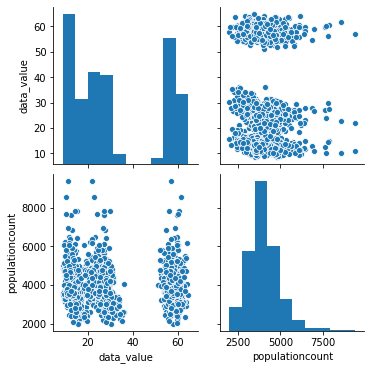

In [31]:
sns.pairplot(chronicdata_new_df)

In [32]:
chronicdata_cat_df = pd.get_dummies(chronicdata_new_df, 
                     columns = ['categoryid'])
chronicdata_cat_df.head()

,stateabbr,cityname,data_value,populationcount,categoryid_HLTHOUT,categoryid_PREVENT,categoryid_UNHBEH
0,AK,Anchorage,11.508811,5305.927273,1,0,0
1,AK,Anchorage,54.669273,5305.927273,0,1,0
2,AK,Anchorage,24.916000,5305.927273,0,0,1
3,AL,Birmingham,17.001368,2356.044444,1,0,0
4,AL,Birmingham,60.233370,2358.582870,0,1,0


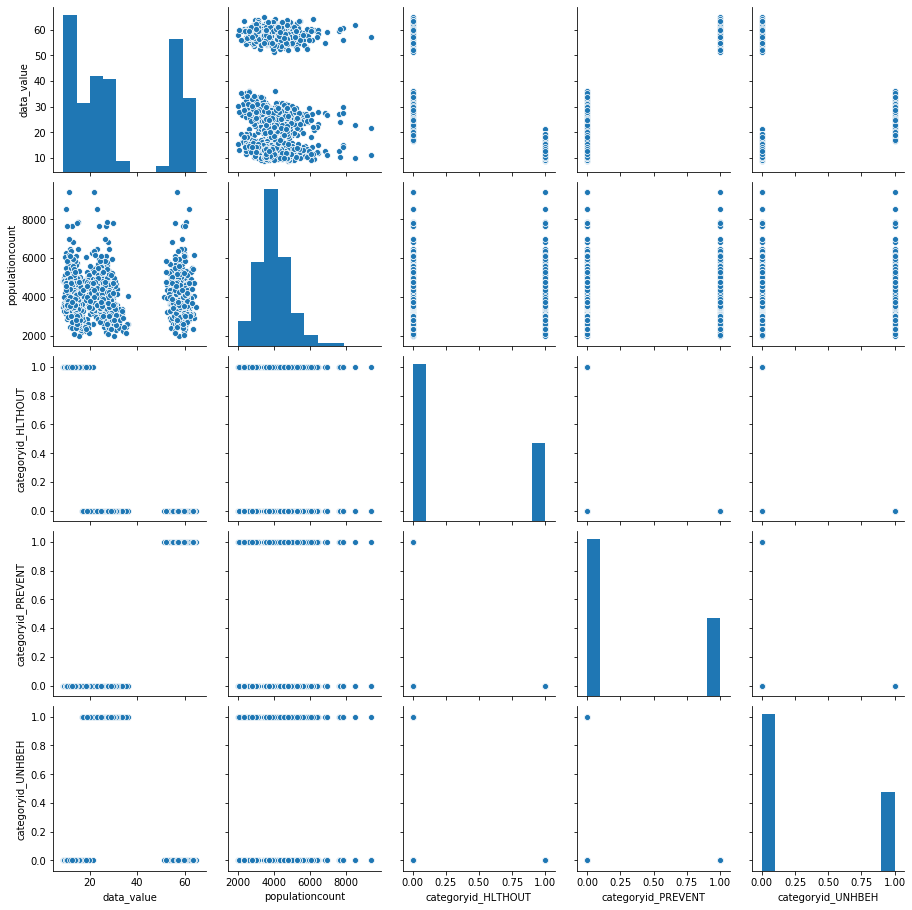

In [33]:
sns.pairplot(chronicdata_cat_df)

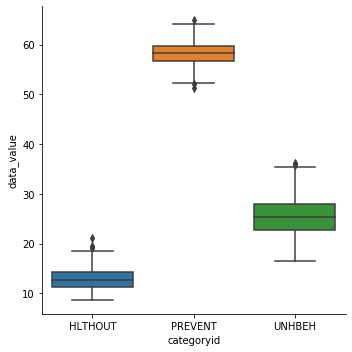

In [35]:
sns.catplot(x="categoryid", y="data_value", kind="box", data=chronicdata_new_df)

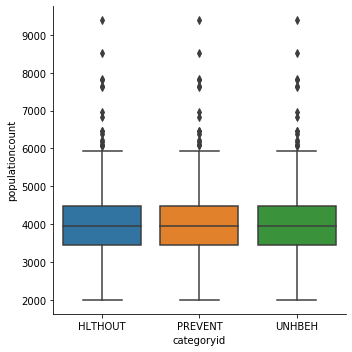

In [36]:
sns.catplot(x="categoryid", y="populationcount", kind="box", data=chronicdata_new_df)

**Analysis 2**

This dataset has data in 3 level granularity: US -> City -> census track
in this approach we are considering analysis at City level. We have data for 500 cities with US.

The data is further divided into 2 types of prevalence: crude prevalence and Age adjusted prevalence. Here we are considering only Crude prevalence.

below we have provided the code to pull the subset of the dataset which we will use as our features for our analysis.

In [34]:
# features - population and unhealthy behaviour , tgt - mean of health outcomes
# get the data set for features. 

chronicdata_2= {}
chronicdata_2= chronicdata_df[(chronicdata_df['geographiclevel']=="City" )]
chronicdata_2 = chronicdata_2[(chronicdata_2["datavaluetypeid"] == "CrdPrv")]
chronicdata_2 = chronicdata_2[chronicdata_2['category'] == 'Unhealthy Behaviors']
chronicdata_2 = chronicdata_2.reset_index(drop= True)
chronicdata_2 = chronicdata_2[['year','stateabbr','cityname','data_value','populationcount','measureid','cityfips']]
chronicdata_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             0 non-null      int64  
 1   stateabbr        0 non-null      object 
 2   cityname         0 non-null      object 
 3   data_value       0 non-null      float64
 4   populationcount  0 non-null      int64  
 5   measureid        0 non-null      object 
 6   cityfips         0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 124.0+ bytes


Create a column that has both state and city to get unique values for 500 cities. Here you should also make a note that unhealthy behaviours is a category and have 5 different measureID. we have to convert the row into column by using pivot inorder to get these - binge,obesity,cmoking,lpa etc as  part of features.

In [8]:
# concat state and city to get unique values for state and city
# chronicdata_2['year_state_city'] =chronicdata_2['year'].astype(str)+','+chronicdata_2['cityname']+' , '+chronicdata_2['stateabbr']
chronicdata_2['state_city'] =chronicdata_2['cityname']+' , '+chronicdata_2['stateabbr']

chronicdata_2.head()

,year,stateabbr,cityname,data_value,populationcount,measureid,cityfips,state_city
0,2017,CA,Hawthorne,15.4,84293,CSMOKING,632548.0,"Hawthorne , CA"
1,2017,CA,Hayward,24.2,144186,OBESITY,633000.0,"Hayward , CA"
2,2017,CA,Lakewood,22.1,80048,OBESITY,639892.0,"Lakewood , CA"
3,2017,AZ,Chandler,20.9,236123,LPA,412000.0,"Chandler , AZ"
4,2017,AZ,Glendale,18.7,226721,CSMOKING,427820.0,"Glendale , AZ"


In [9]:
cd_cat_unhealth ={}
cd_cat_unhealth = chronicdata_2[['state_city','measureid','data_value']]

Now we have a dataset for 500 cities with 5 measureID for each city. We have 2500 rows of data.

In [10]:
len(cd_cat_unhealth)

2500

using pivot() to convert measureID to columns which will be used as features in our analysis

In [11]:
 cat_2 = cd_cat_unhealth.pivot(index= 'state_city',columns='measureid',values = 'data_value').reset_index()
cat_2  

measureid,state_city,BINGE,CSMOKING,LPA,OBESITY,SLEEP
0,"Abilene , TX",19.5,19.0,32.7,33.1,33.2
1,"Akron , OH",16.7,24.9,37.0,37.4,42.9
2,"Alameda , CA",18.1,11.2,16.8,20.2,33.7
3,"Albany , GA",11.9,23.7,39.8,40.6,47.1
4,"Albany , NY",19.3,18.2,26.8,28.5,37.7
...,...,...,...,...,...,...
495,"Wyoming , MI",20.7,20.8,26.9,32.7,36.0
496,"Yakima , WA",14.4,17.9,28.5,36.8,33.3
497,"Yonkers , NY",16.6,15.7,28.3,27.1,36.3
498,"Youngstown , OH",12.9,28.1,44.2,45.1,45.0


In [12]:
#convert ciityfips to int from float
chronicdata_2['cityfips'] =np.int64(chronicdata_2['cityfips'])

In [13]:
# to get the unique set of data
chronicdata_pp =chronicdata_2.groupby(['stateabbr','cityname','cityfips'])['populationcount'].mean().reset_index()
chronicdata_pp['state_city'] =chronicdata_pp['cityname']+' , '+chronicdata_pp['stateabbr']
chronicdata_pp

,stateabbr,cityname,cityfips,populationcount,state_city
0,AK,Anchorage,203000,291826,"Anchorage , AK"
1,AL,Birmingham,107000,212237,"Birmingham , AL"
2,AL,Hoover,135896,81619,"Hoover , AL"
3,AL,Huntsville,137000,180105,"Huntsville , AL"
4,AL,Mobile,150000,195111,"Mobile , AL"
...,...,...,...,...,...
495,WI,Milwaukee,5553000,594833,"Milwaukee , WI"
496,WI,Racine,5566000,78860,"Racine , WI"
497,WI,Waukesha,5584250,70718,"Waukesha , WI"
498,WV,Charleston,5414600,51400,"Charleston , WV"


Merge the 2 dataset - chronicdata_pp and cat_2 to form the feature dataset (chronicdatafeat)

In [14]:

chronicdata_feat = pd.merge(chronicdata_pp,cat_2,on = 'state_city',how='inner')
chronicdata_feat = chronicdata_feat.drop(['state_city'],axis = 1)
chronicdata_feat

,stateabbr,cityname,cityfips,populationcount,BINGE,CSMOKING,LPA,OBESITY,SLEEP
0,AK,Anchorage,203000,291826,20.3,17.9,20.8,34.2,31.3
1,AL,Birmingham,107000,212237,11.6,21.8,37.8,41.2,41.5
2,AL,Hoover,135896,81619,15.4,13.4,24.2,28.8,32.9
3,AL,Huntsville,137000,180105,13.3,18.4,30.6,35.5,37.8
4,AL,Mobile,150000,195111,13.6,20.5,35.8,37.5,39.1
...,...,...,...,...,...,...,...,...,...
495,WI,Milwaukee,5553000,594833,23.0,22.4,29.5,35.0,39.2
496,WI,Racine,5566000,78860,23.4,21.1,26.4,39.9,39.8
497,WI,Waukesha,5584250,70718,24.4,16.7,21.0,31.2,33.4
498,WV,Charleston,5414600,51400,11.8,21.4,29.1,38.7,39.6


To get the target column, here we are considering healthoutcomes as our target column in our analysis. Since there are 13 measureIDs for Healthoutcome and we are considering only one target variable we have considered the mean all the the healthoutcomes for the 500 cities. Below we are following the same steps and features to create the target dataset.

In [15]:
# to get the target - mean of health outcomes
chronicdata_3= {}
chronicdata_3= chronicdata_df[(chronicdata_df['geographiclevel']=="City" )]
chronicdata_3 = chronicdata_3[(chronicdata_3["datavaluetypeid"] == "CrdPrv")]
chronicdata_3 = chronicdata_3[chronicdata_3['categoryid'] == 'HLTHOUT']
chronicdata_3 = chronicdata_3.reset_index(drop= True)
chronicdata_3 = chronicdata_3[['year','stateabbr','cityname','data_value','populationcount','measureid','cityfips']]
chronicdata_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             6500 non-null   int64  
 1   stateabbr        6500 non-null   object 
 2   cityname         6500 non-null   object 
 3   data_value       6500 non-null   float64
 4   populationcount  6500 non-null   int64  
 5   measureid        6500 non-null   object 
 6   cityfips         6500 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 355.6+ KB


In [16]:
chronicdata_tgt = chronicdata_3.groupby(['stateabbr','cityname','cityfips'])['populationcount','data_value'].mean().reset_index()
chronicdata_tgt.head()

C:\Users\achso\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,stateabbr,cityname,cityfips,populationcount,data_value
0,AK,Anchorage,203000.0,291826,11.423077
1,AL,Birmingham,107000.0,212237,17.400000
2,AL,Hoover,135896.0,81619,12.376923
3,AL,Huntsville,137000.0,180105,14.961538
4,AL,Mobile,150000.0,195111,16.623077


combine the feature dataset and the target dataset to form the result dataset that will be used in the analysis

In [17]:
chronicdata_results = pd.merge(chronicdata_feat,chronicdata_tgt,on = ['stateabbr','cityname'],how = 'inner')
chronicdata_results = chronicdata_results.drop(['cityfips_y','populationcount_y'],axis = 1)
chronicdata_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stateabbr          500 non-null    object 
 1   cityname           500 non-null    object 
 2   cityfips_x         500 non-null    int64  
 3   populationcount_x  500 non-null    int64  
 4   BINGE              500 non-null    float64
 5   CSMOKING           500 non-null    float64
 6   LPA                500 non-null    float64
 7   OBESITY            500 non-null    float64
 8   SLEEP              500 non-null    float64
 9   data_value         500 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 43.0+ KB


In [18]:
chronicdata_results.head()

,stateabbr,cityname,cityfips_x,populationcount_x,BINGE,CSMOKING,LPA,OBESITY,SLEEP,data_value
0,AK,Anchorage,203000,291826,20.3,17.9,20.8,34.2,31.3,11.423077
1,AL,Birmingham,107000,212237,11.6,21.8,37.8,41.2,41.5,17.400000
2,AL,Hoover,135896,81619,15.4,13.4,24.2,28.8,32.9,12.376923
3,AL,Huntsville,137000,180105,13.3,18.4,30.6,35.5,37.8,14.961538
4,AL,Mobile,150000,195111,13.6,20.5,35.8,37.5,39.1,16.623077


Below, we have a pairplot to see the relation between each vairable.



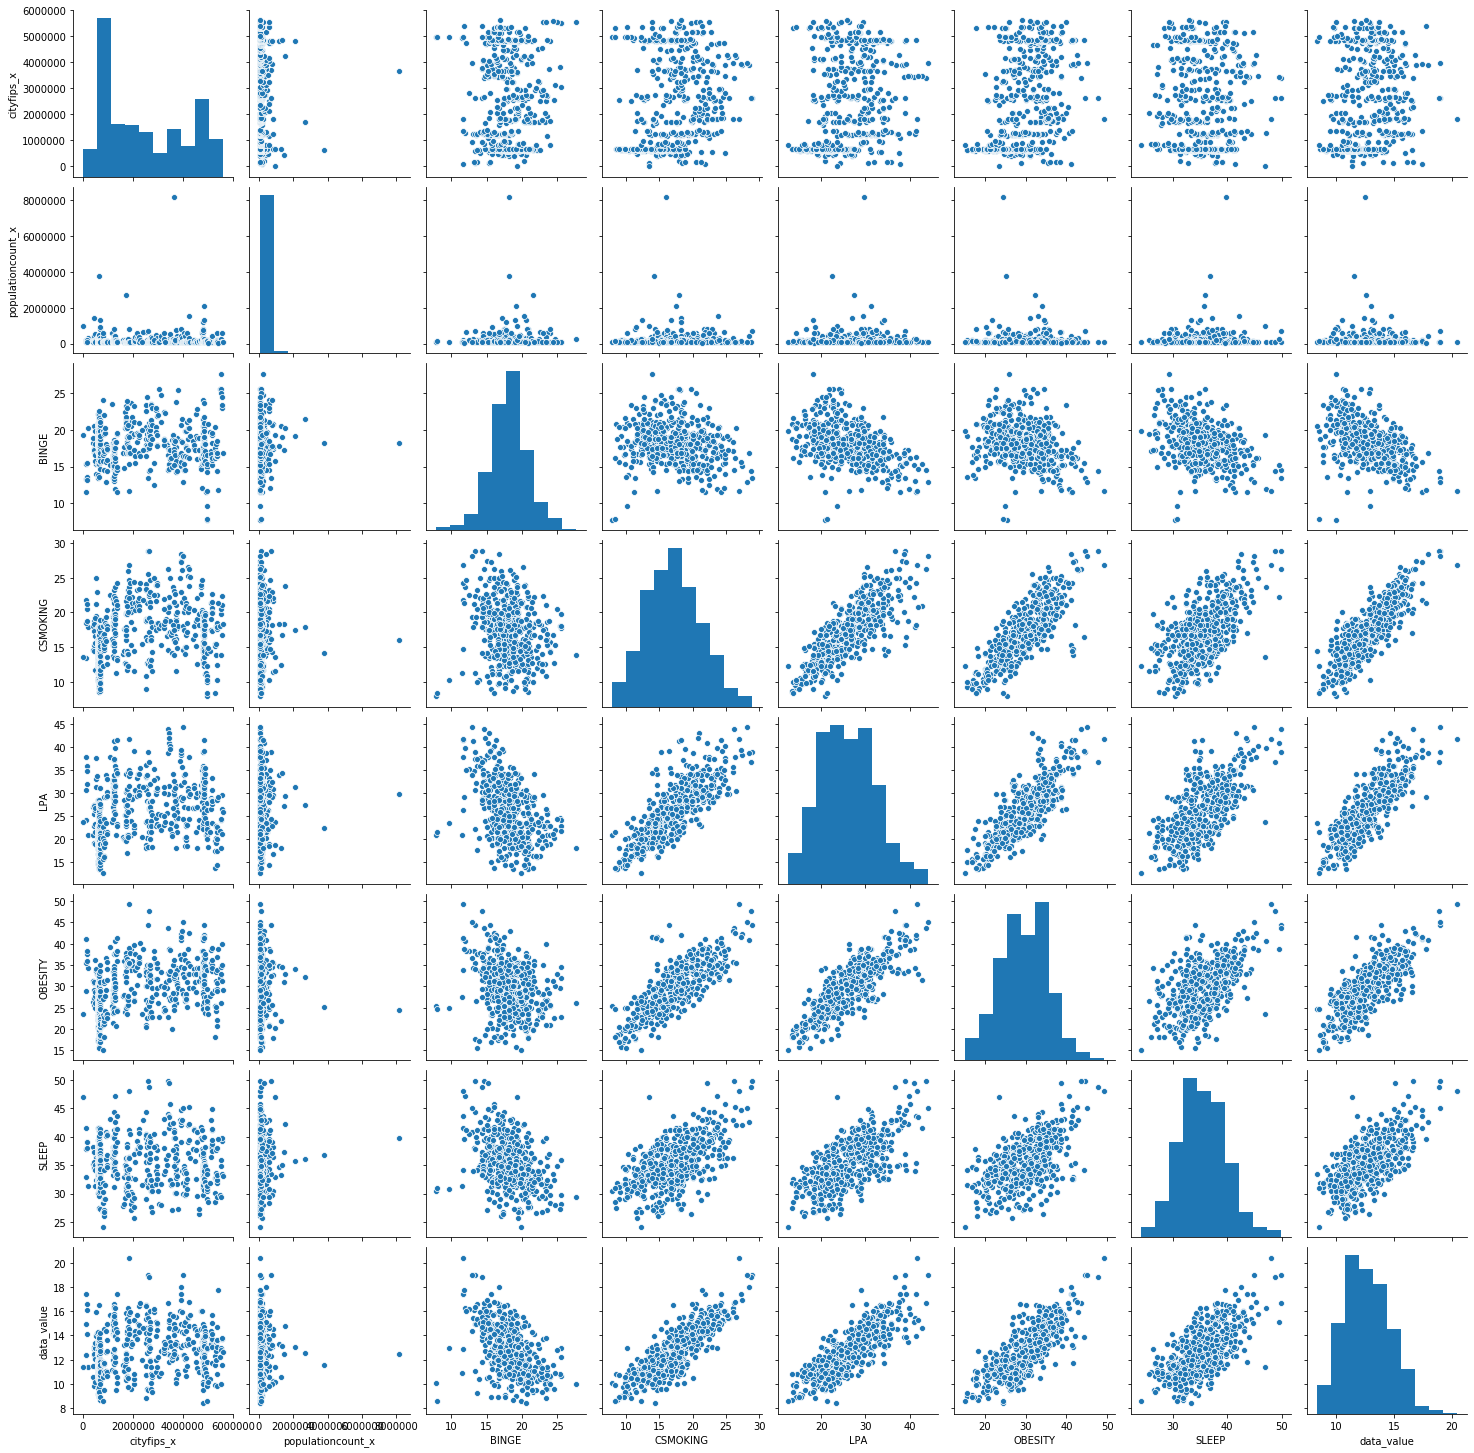

In [19]:
sns.pairplot(chronicdata_results)
plt.show()

In [20]:
chronicdata_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stateabbr          500 non-null    object 
 1   cityname           500 non-null    object 
 2   cityfips_x         500 non-null    int64  
 3   populationcount_x  500 non-null    int64  
 4   BINGE              500 non-null    float64
 5   CSMOKING           500 non-null    float64
 6   LPA                500 non-null    float64
 7   OBESITY            500 non-null    float64
 8   SLEEP              500 non-null    float64
 9   data_value         500 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 63.0+ KB


we have also plotted graphs to see the relationship of each feature with the target

C:\Users\achso\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


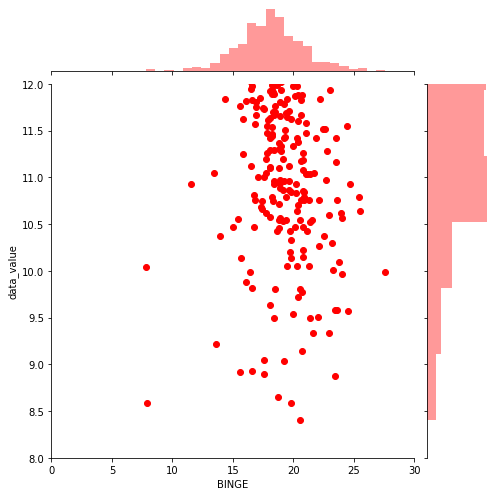

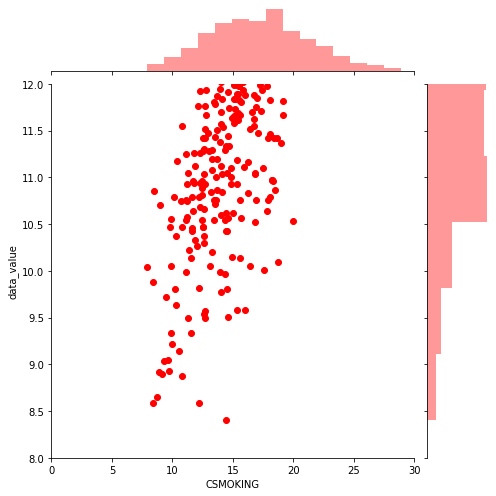

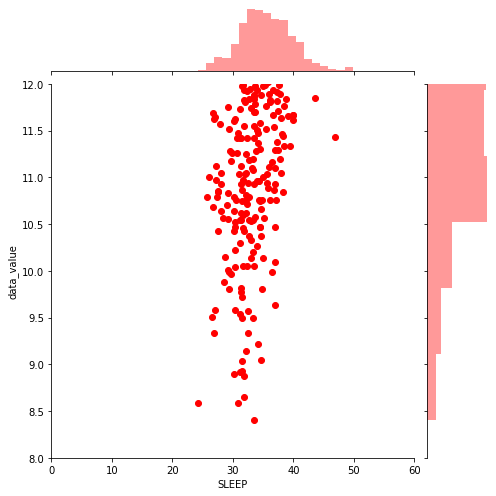

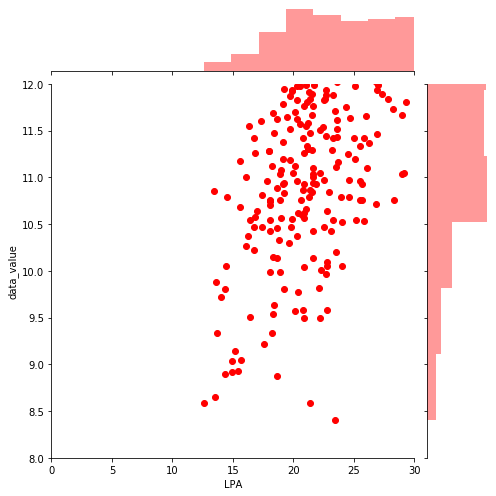

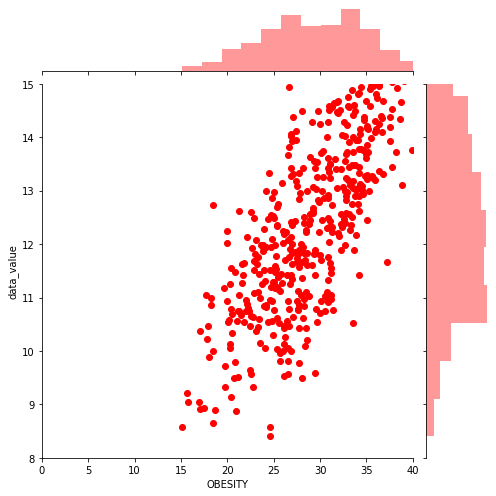

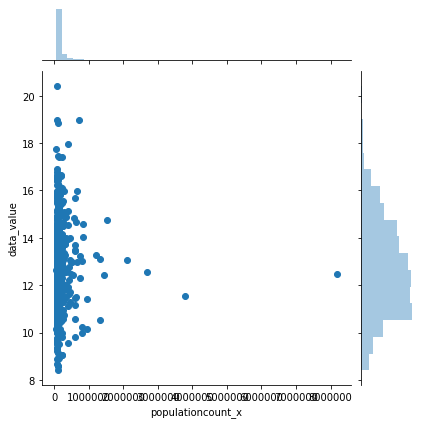

In [21]:
# joint plot
g = sns.jointplot("BINGE", "data_value", data=chronicdata_results, xlim=(0, 30), ylim=(8, 12), color="r", size=7)
g = sns.jointplot("CSMOKING", "data_value", data=chronicdata_results, xlim=(0, 30), ylim=(8, 12), color="r", size=7)
g = sns.jointplot("SLEEP", "data_value", data=chronicdata_results, xlim=(0, 60), ylim=(8, 12), color="r", size=7)
g = sns.jointplot("LPA", "data_value", data=chronicdata_results, xlim=(0, 30), ylim=(8, 12), color="r", size=7)
g = sns.jointplot("OBESITY", "data_value", data=chronicdata_results, xlim=(0, 40), ylim=(8, 15), color="r", size=7)
g = sns.jointplot("populationcount_x", "data_value", data=chronicdata_results)

In [22]:
#OLS regression model result set for only one feature

lm = sm.ols(formula='data_value ~ BINGE', data=chronicdata_results).fit()
y_hat = lm.predict(chronicdata_results[['BINGE']])
print("MSE_lm:", mean_squared_error(chronicdata_results['data_value'].values, y_hat))
lm.summary()

MSE_lm: 3.0153226603587795


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             data_value   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     148.5
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.45e-30
Time:                        21:15:24   Log-Likelihood:                -985.40
No. Observations:                 500   AIC:                             1975.
Df Residuals:                     498   BIC:                             1983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1527      0.532     36.031      0.000      18.108      20.197
BINGE         -0.3539      0.029    -12.186      0.000      -0.411      -0.297
==============================================================================
Omnibus:                       11.816   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.240
Skew:                          -0.141   Prob(JB):                     6.64e-05
Kurtosis:                       3.919   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#OLS regression model for all the features
lm = sm.ols(formula='data_value ~ BINGE + CSMOKING + LPA + SLEEP + OBESITY', data=chronicdata_results).fit()
y_hat = lm.predict(chronicdata_results[['BINGE','CSMOKING' ,'LPA','SLEEP','OBESITY']])
#print("MSE_lm:", mean_squared_error(chronicdata_results['data_value'].values, y_hat))
lm.summary()
mse_lm = mean_squared_error(chronicdata_results['data_value'].values, y_hat)
r_squared = lm.rsquared
print("MSE:", mse_lm, "R-Squared: ", r_squared)

MSE: 0.6512030003449746 R-Squared:  0.833641487179459


OLS model including features like populationcount_x and cityfips_x to see if it significantly changes the value of MSE and r-Squared

In [23]:
lm = sm.ols(formula='data_value ~ BINGE + CSMOKING + LPA + SLEEP + OBESITY + populationcount_x + cityfips_x', data=chronicdata_results).fit()
y_hat = lm.predict(chronicdata_results[['BINGE','CSMOKING' ,'LPA','SLEEP','OBESITY','populationcount_x','cityfips_x']])
#print("MSE_lm:", mean_squared_error(chronicdata_results['data_value'].values, y_hat))
lm.summary()
mse_lm = mean_squared_error(chronicdata_results['data_value'].values, y_hat)
r_squared = lm.rsquared
print("MSE:", mse_lm, "R-Squared: ", r_squared)

MSE: 0.6400388185414925 R-Squared:  0.8364935266828113


In [24]:
df = chronicdata_results[["BINGE","LPA","OBESITY","SLEEP","CSMOKING"]]

In [25]:
correlations = chronicdata_results[["BINGE","LPA","OBESITY","SLEEP","CSMOKING","populationcount_x","cityfips_x"]].corr()
correlations

,BINGE,LPA,OBESITY,SLEEP,CSMOKING,populationcount_x,cityfips_x
BINGE,1.000000,-0.442213,-0.293567,-0.377522,-0.202976,0.034029,-0.002756
LPA,-0.442213,1.000000,0.835170,0.656265,0.797628,0.048521,0.264065
OBESITY,-0.293567,0.835170,1.000000,0.551855,0.808752,-0.008489,0.369694
SLEEP,-0.377522,0.656265,0.551855,1.000000,0.602686,0.087783,-0.006947
CSMOKING,-0.202976,0.797628,0.808752,0.602686,1.000000,0.019068,0.250073
populationcount_x,0.034029,0.048521,-0.008489,0.087783,0.019068,1.000000,0.033120
cityfips_x,-0.002756,0.264065,0.369694,-0.006947,0.250073,0.033120,1.000000


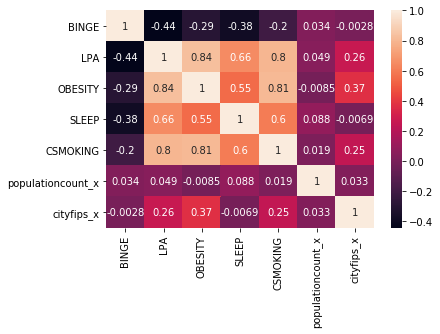

In [26]:
# Heatmap 
sns.heatmap(correlations, annot=True)